In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Open file line by line
# Read depth = 'DP'
# Allele quality = 'QA'
# Allele frequency = 'AF'
# ANN = T|disruptive_inframe_deletion (predicted variant effect)

depth = []
quality = []
allele_freq = []
pred_effect = defaultdict(int)

# read file line by line
with open('var4.vcf','r') as f:
    for line in f:
        if (line[0] != '#'):
            try:
                depth.append(int(line.split('DP=')[1].split(';')[0]))
            except:
                depth.append(int(line.split('DP=')[1].split(';')[0].split(',')[0]))
            try:
                quality.append(int(line.split(';QA=')[1].split(';')[0]))
            except:
                quality.append(int(line.split(';QA=')[1].split(';')[0].split(',')[0]))
            try:
                allele_freq.append(float(line.split(';AF=')[1].split(';')[0]))
            except:
                allele_freq.append(float(line.split(';AF=')[1].split(';')[0].split(',')[0]))
            effect_name = line.split('ANN=')[1].split('|')[1].split('|')[0]
            if ('&' in line.split('ANN=')[1].split('|')[1].split('|')[0]):
                effect_name = effect_name.split('&')[1]
            if effect_name != '':
                pred_effect[effect_name] += 1

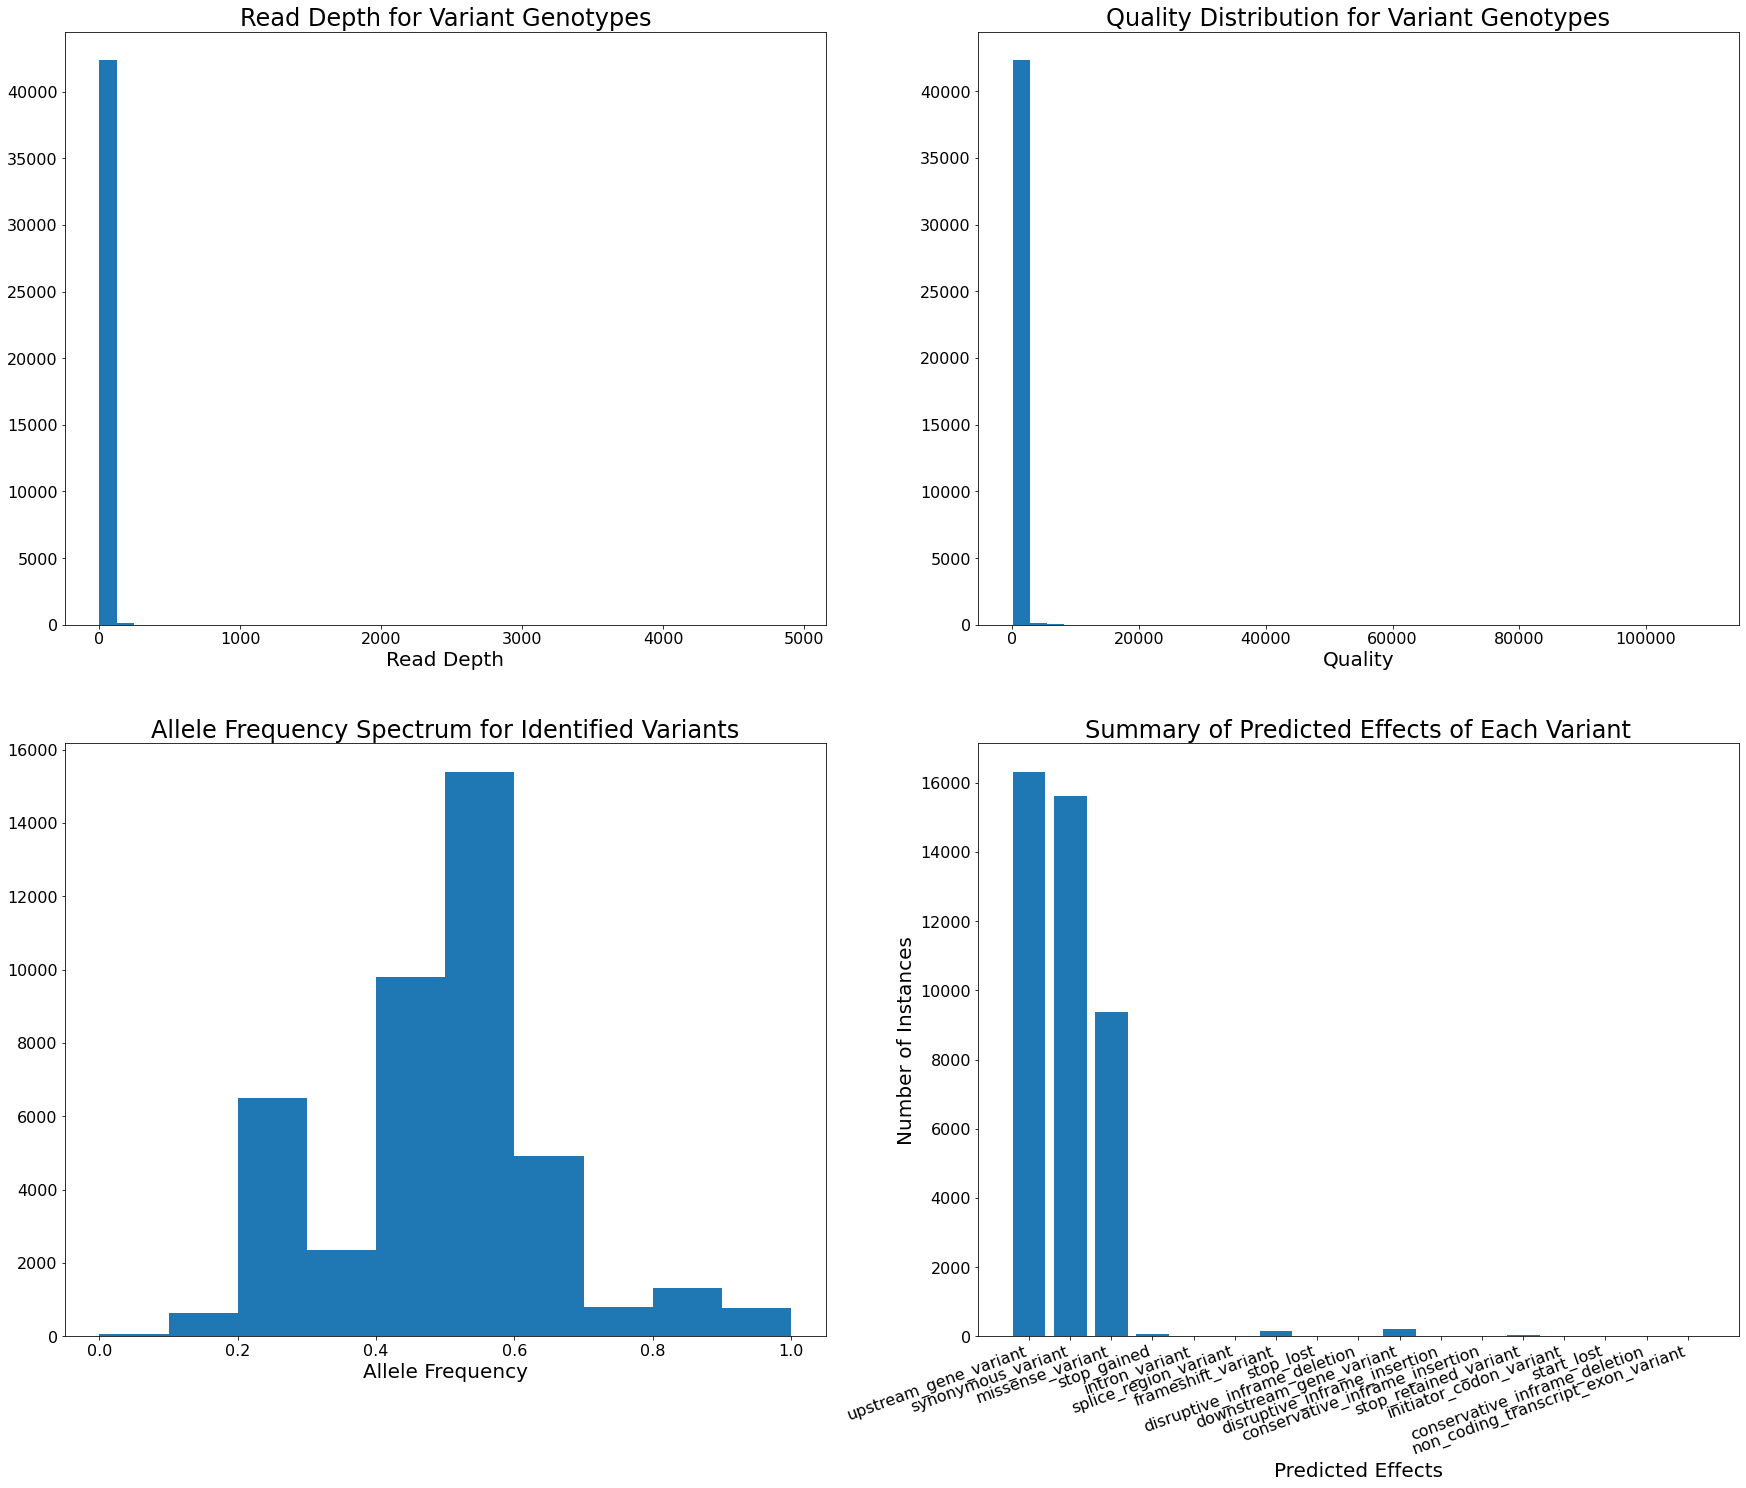

In [2]:
# Generate lists to create bar graph
effects = []
freq = []
for item in pred_effect.keys():
    effects.append(item)
    freq.append(pred_effect[item])

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Create bar graph for allele effects
fig, ax = plt.subplots(2,2,figsize = (30,24))
ax[0,0].hist(depth,bins = 40)
ax[0,0].set_title('Read Depth for Variant Genotypes',fontsize = 24)
ax[0,0].set_xlabel('Read Depth',fontsize=20)

ax[0,1].hist(quality,bins=40)
ax[0,1].set_title('Quality Distribution for Variant Genotypes',fontsize = 24)
ax[0,1].set_xlabel('Quality',fontsize=20)

ax[1,0].hist(allele_freq,bins=10)
ax[1,0].set_title('Allele Frequency Spectrum for Identified Variants',fontsize = 24)
ax[1,0].set_xlabel('Allele Frequency',fontsize=20)

ax[1,1].bar( effects, freq)
ax[1,1].set_title("Summary of Predicted Effects of Each Variant",fontsize = 24)
ax[1,1].set_xlabel("Predicted Effects", fontsize = 20)
ax[1,1].set_ylabel("Number of Instances", fontsize = 20)
plt.xticks(rotation=20,ha='right') # turns the xticks to an angle
plt.show()# Generate lists to create bar graph

Text(0.5, 1.0, 'Read Depth for Variant Genotypes')

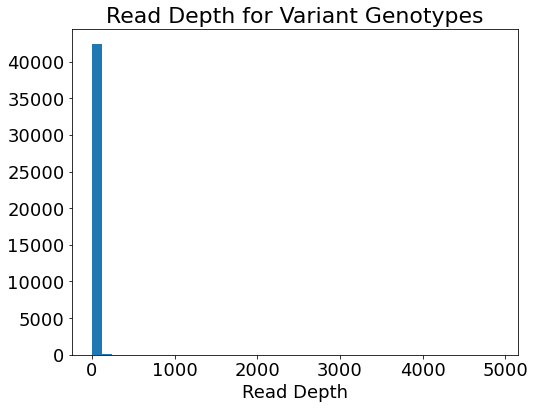

In [3]:
# Create histogram of read depth
plt.figure(figsize=(8,6))
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.hist(depth,bins=40)
plt.xlabel('Read Depth',fontsize = 18)
plt.title('Read Depth for Variant Genotypes', fontsize = 22)

Text(0.5, 1.0, 'Quality Distribution for Variant Genotypes')

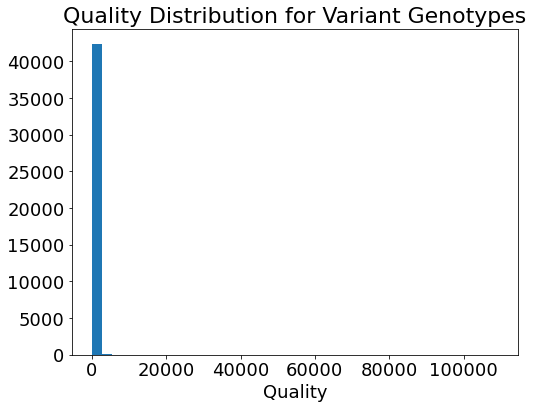

In [5]:
# Create histogram of allele quality
plt.figure(figsize=(8,6))
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.hist(quality,bins=40)
plt.xlabel('Quality',fontsize = 18)
plt.title('Quality Distribution for Variant Genotypes', fontsize = 22)

Text(0.5, 1.0, 'Allele Frequency Spectrum for Identified Variants')

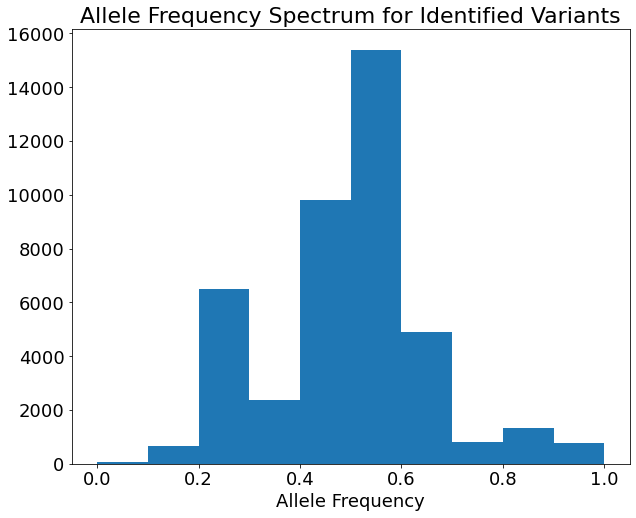

In [96]:
# Create histogram of allele frequency
plt.figure(figsize=(10,8))
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.hist(allele_freq,bins=10)
plt.xlabel('Allele Frequency',fontsize = 18)
plt.title('Allele Frequency Spectrum for Identified Variants', fontsize = 22)

In [6]:
len(depth)

42569

In [105]:
pred_effect

defaultdict(int,
            {'upstream_gene_variant': 16318,
             'synonymous_variant': 15607,
             'missense_variant': 9369,
             'stop_gained': 76,
             'intron_variant': 13,
             'splice_region_variant': 19,
             'frameshift_variant': 151,
             'stop_lost': 15,
             'disruptive_inframe_deletion': 21,
             'downstream_gene_variant': 226,
             'disruptive_inframe_insertion': 9,
             'conservative_inframe_insertion': 10,
             'stop_retained_variant': 28,
             'initiator_codon_variant': 1,
             'start_lost': 22,
             'conservative_inframe_deletion': 6,
             'non_coding_transcript_exon_variant': 1})

In [7]:
import numpy as np
np.average(depth)

43.76107026239752

In [8]:
np.average(quality)

636.5393596278982

In [ ]:
np.average()